# Методы анализа данных

Выполнил ***Мальцев Максим Александрович***

# Практическая работа №2

**Цель**: знакомство  с основными  задачами  предварительной обработки    исходных    данных,    изучение    основных    методов предварительной   обработки   данных,   формирование   навыков выполнения   предварительной   обработки   исходных   данных   с помощью языка программирования Python.

**Задачи**: Выполнение   практической   работы   предполагает   решение следующий задач:
1. Визуальный анализ исходных данных
2. Поиск аномальных значений
3. Поиск и восстановление отсутствующих значений
4. Преобразование данных

# Ход работы

## Загрузка исходных данных

In [808]:
# Импортируем все необходимые библиотеки
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats

In [809]:
# Загружаем данные из файла first_practice_dataframe.xlsx
dataframe = pd.read_excel("first_practice_dataframe.xlsx")
dataframe.head(5)

,Unnamed: 0,cat1_gender,cat2_hairColor,cat3_education,cat4_income,cat5_customerSatisfaction,cat6_brandOfSoaps,cat7_motivesForEmployeesToWorkBetter,cat8_motivesForTravelling,cat9_age,...,num3_16,num3_17,num3_18,num3_19,num3_20,num3_21,num3_22,num3_23,num3_24,num3_25
0,0,male,black,high school,"$40,001 - $50,000",good,lux,Peer motivation,Health,below 21 years,...,116.806927,234.452862,284.304766,663.188133,266.017853,29.215246,648.5319,598.534627,971.167308,703.129209
1,1,male,Red,phd,"$40,001 - $50,000",Good,NaN,Professional growth opportunities,Study,59 years and above,...,98.26433,193.074047,320.926465,409.817217,279.6318,47.219151,665.864398,540.066994,933.449443,614.411678
2,2,male,black,School SAT,"$40,001 - $50,000",Good,Lux,peer motivation,Family,59 years and above,...,NaN,271.721837,411.846997,540.369226,703.053616,21.810823,667.958668,,950.209325,530.122551
3,3,NaN,Red,BSc,"Below $30,001",Very good,lux,Recognition,Health,59 years and above,...,116.613291,,410.483469,382.262612,779.486696,109.295732,651.231183,601.869269,942.957073,620.665623
4,4,male,black,phd,-,Very good,Dove,Recognition,Health,59 years and above,...,146.187875,259.617643,474.096709,410.063319,563.026229,152.853238,645.612568,422.557245,947.163814,558.01966


Так как я 16 вариант, то выберем из датафрейма следующие столбцы

In [810]:
dataframe = dataframe[["cat7_motivesForEmployeesToWorkBetter", "cat11_nationality", "num1_17", "num2_17", "num3_17"]]
dataframe.head(5)

,cat7_motivesForEmployeesToWorkBetter,cat11_nationality,num1_17,num2_17,num3_17
0,Peer motivation,german,746.033603,575.685875,234.452862
1,Professional growth opportunities,German,-1544.380353,1183.133379,193.074047
2,peer motivation,german,199.690743,694.251442,271.721837
3,Recognition,German,70.527654,1114.841772,
4,Recognition,german,-40.749440,922.224064,259.617643


In [811]:
# Информация о датасете
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   cat7_motivesForEmployeesToWorkBetter  981 non-null    object 
 1   cat11_nationality                     980 non-null    object 
 2   num1_17                               1000 non-null   float64
 3   num2_17                               952 non-null    float64
 4   num3_17                               971 non-null    object 
dtypes: float64(2), object(3)
memory usage: 39.2+ KB


## Задание 1. Визуальный анализ данных

Построить   визуальное   представление   для   каждого   столбца (признака) в исходном наборе данных. Провести анализ полученных диаграмм. Примечание: для качественных переменных должны быть построены  столбчатая  и  круговая  диаграммы,  для  количественных переменных –гистограмма,  оценка  плотности  распределения  и диаграмма «ящик с усами».

### Анализ cat7_motivesForEmployeesToWorkBetter

Это качественная переменная, поэтому строим для неё столбчатую и круговую диаграмму

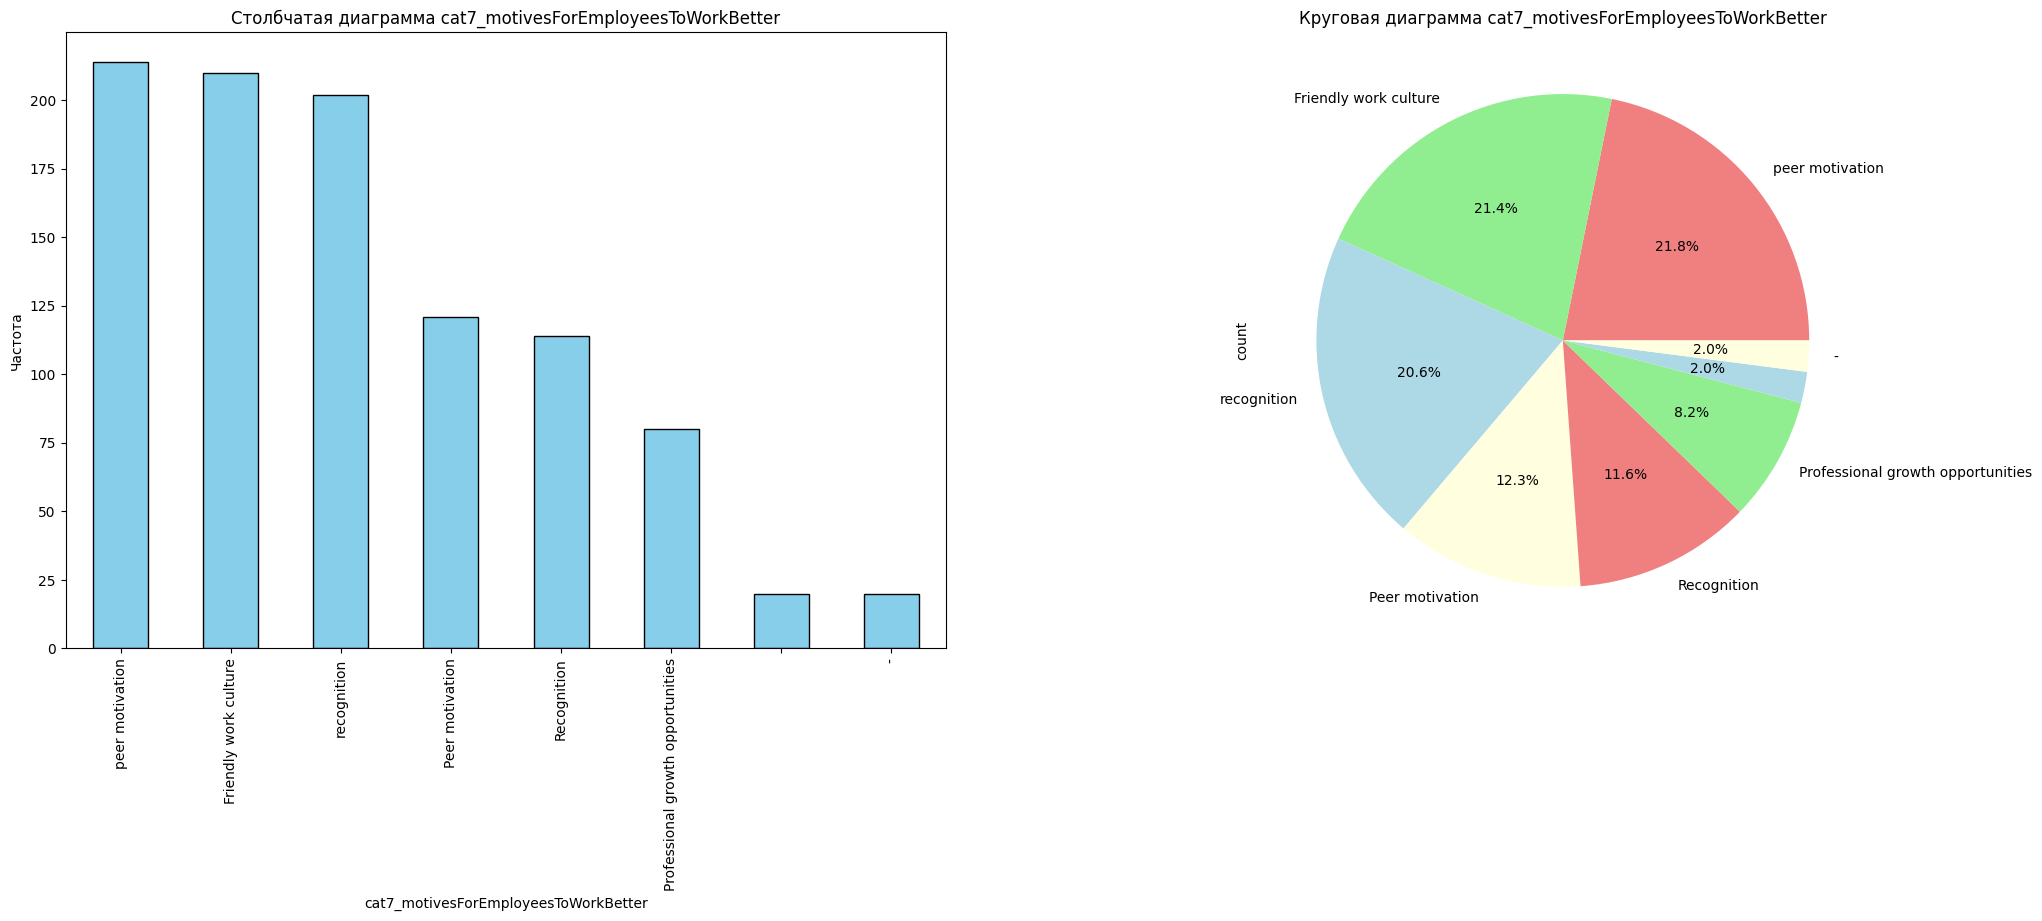

In [812]:
# Задаем столбик, по которому будем строить визуальное представление
col = "cat7_motivesForEmployeesToWorkBetter"


plt.figure(figsize=(25, 8))

# Столбчатая диаграмма
plt.subplot(1, 2, 1)
dataframe[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title(f'Столбчатая диаграмма {col}')
plt.xlabel(col)
plt.ylabel('Частота')

# Круговая диаграмма
plt.subplot(1, 2, 2)
dataframe[col].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightgreen', 'lightblue', 'lightyellow'])
plt.title(f'Круговая диаграмма {col}')

plt.show()

Кто-то не мог определиться, с большой или с маленькой буквы писать значения переменной, а ещё пустое значение задается двумя значениями. А по распределению данных всё относительно неплохо, отсутствующих значения мало.

### Анализ cat11_nationality

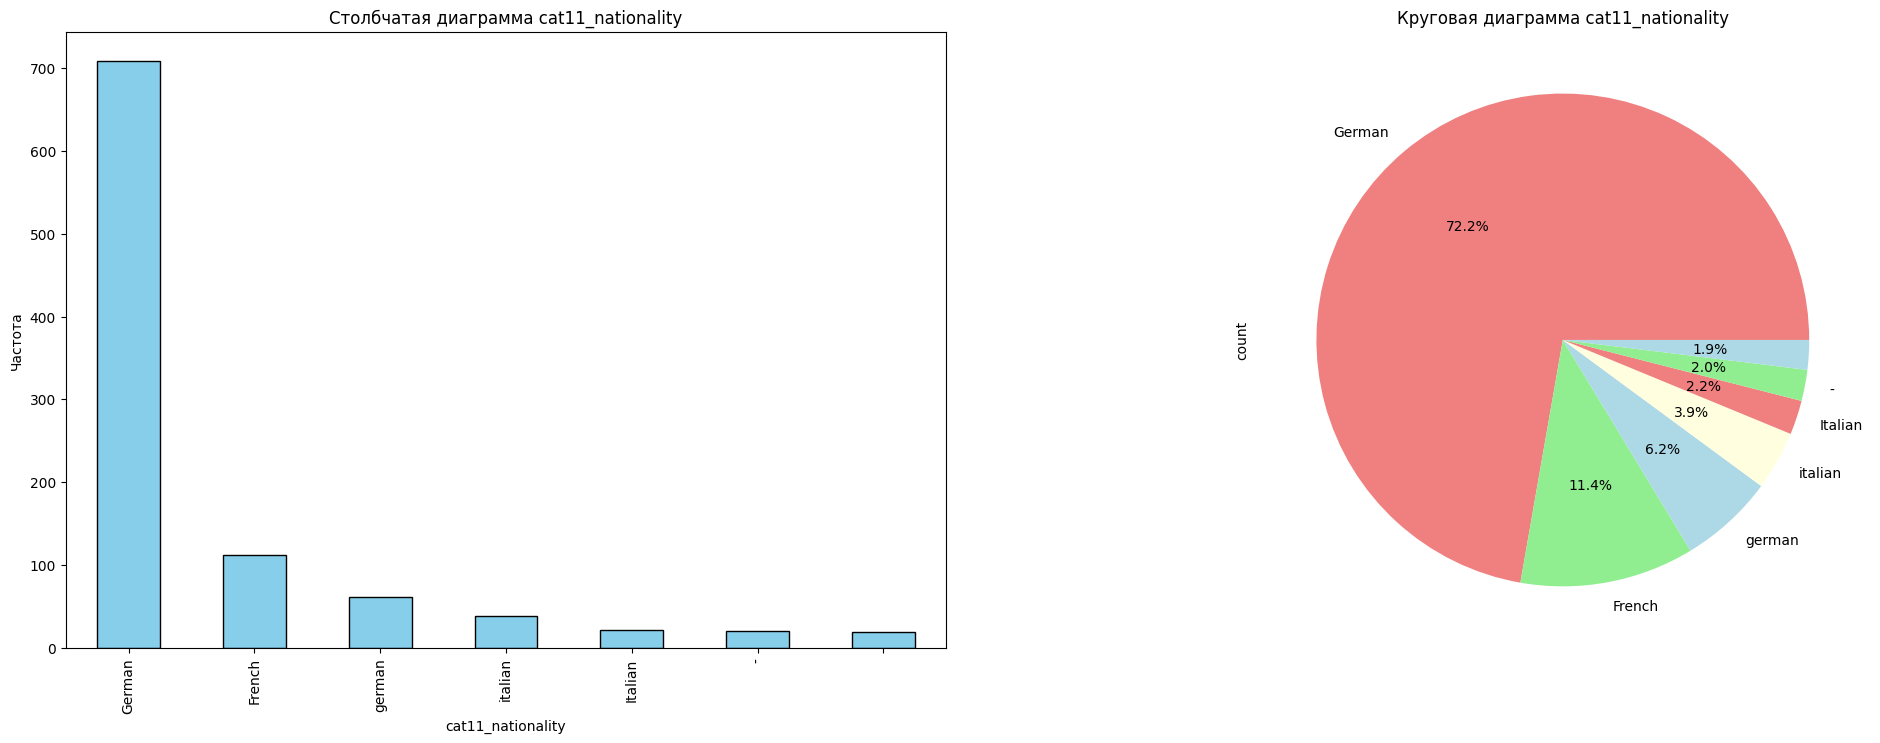

In [813]:
# Задаем столбик, по которому будем строить визуальное представление
col = "cat11_nationality"

plt.figure(figsize=(25, 8))

# Столбчатая диаграмма
plt.subplot(1, 2, 1)
dataframe[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title(f'Столбчатая диаграмма {col}')
plt.xlabel(col)
plt.ylabel('Частота')

# Круговая диаграмма
plt.subplot(1, 2, 2)
dataframe[col].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightgreen', 'lightblue', 'lightyellow'])
plt.title(f'Круговая диаграмма {col}')

plt.show()

Опять проблемы с заглавными буквами и пропусками. А также можно понять, что немцев среди национальностей гораааздо больше.

### Анализ num1_17

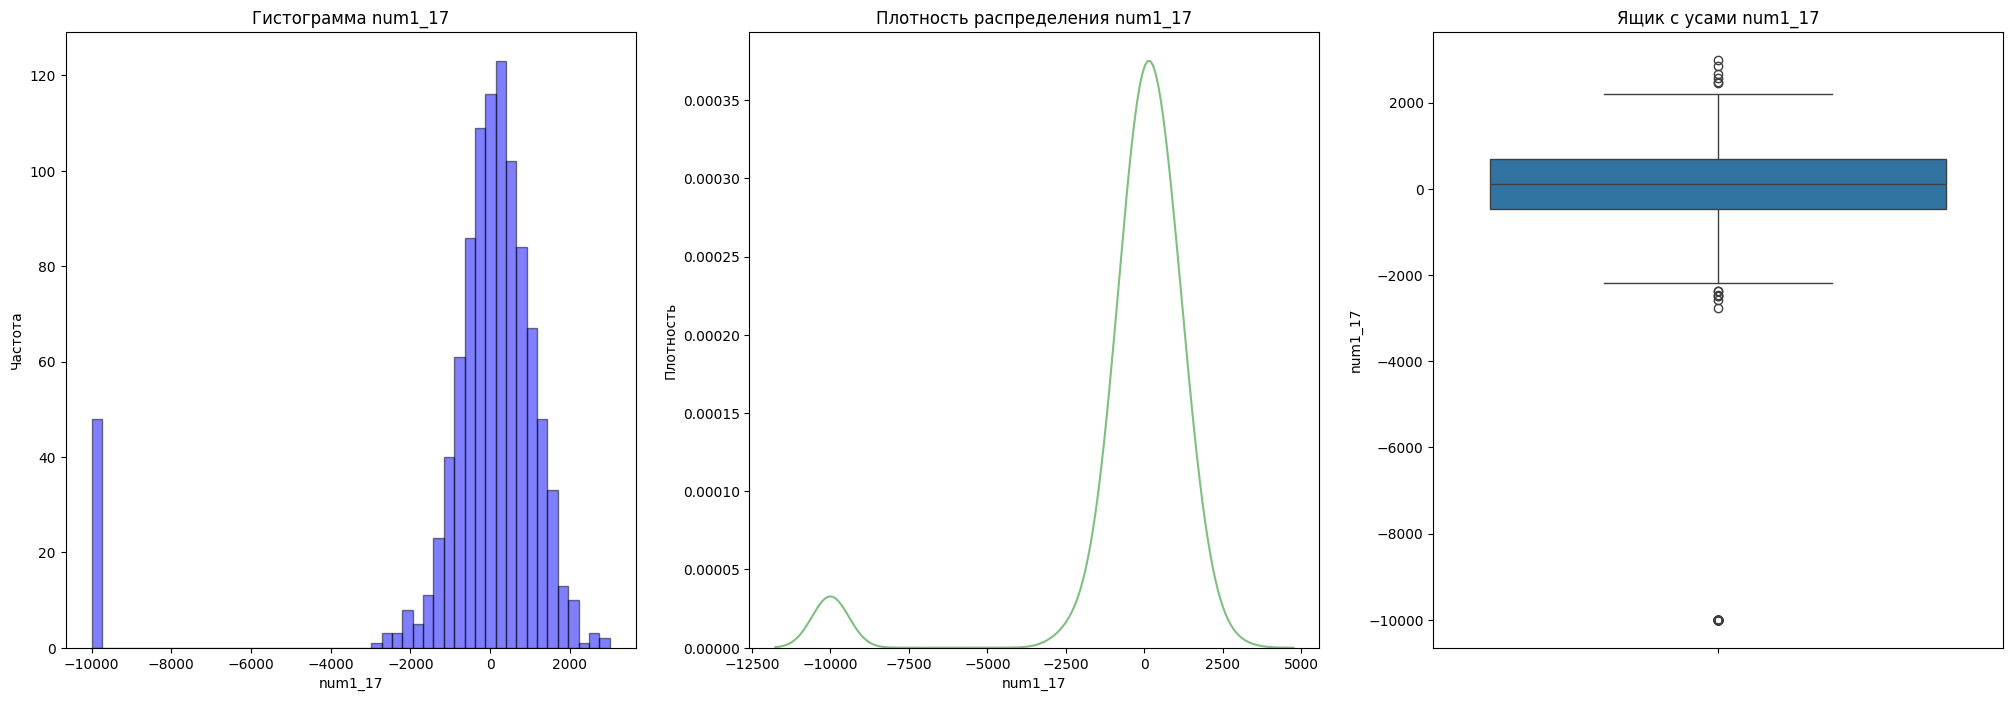

In [814]:
# Задаем столбик, по которому будем строить визуальное представление
col = "num1_17"

plt.figure(figsize=(25, 8))

# Гистограмма
plt.subplot(1, 3, 1)
plt.hist(dataframe[col], bins=50, color='blue', edgecolor='black', alpha=0.5)
plt.title(f'Гистограмма {col}')
plt.xlabel(col)
plt.ylabel('Частота')

# Оценка плотности распределения (график)
plt.subplot(1, 3, 2)
sns.kdeplot(dataframe[col], color='green', alpha=0.5)
plt.title(f'Плотность распределения {col}')
plt.xlabel(col)
plt.ylabel('Плотность')

# Ящик с усами
plt.subplot(1, 3, 3)
sns.boxplot(dataframe[col])
plt.title(f'Ящик с усами {col}')
plt.ylabel(col)

plt.show()

In [815]:
dataframe['num1_17'].min()

np.float64(-9999.0)

Можно заметить, что в пределах 0 данное значение распределено нормально, однако также существует некоторое абсолютно-нулевое значение (-9999.0), которое считается альтернативой пропуску. Запомним это.

### Анализ num2_17

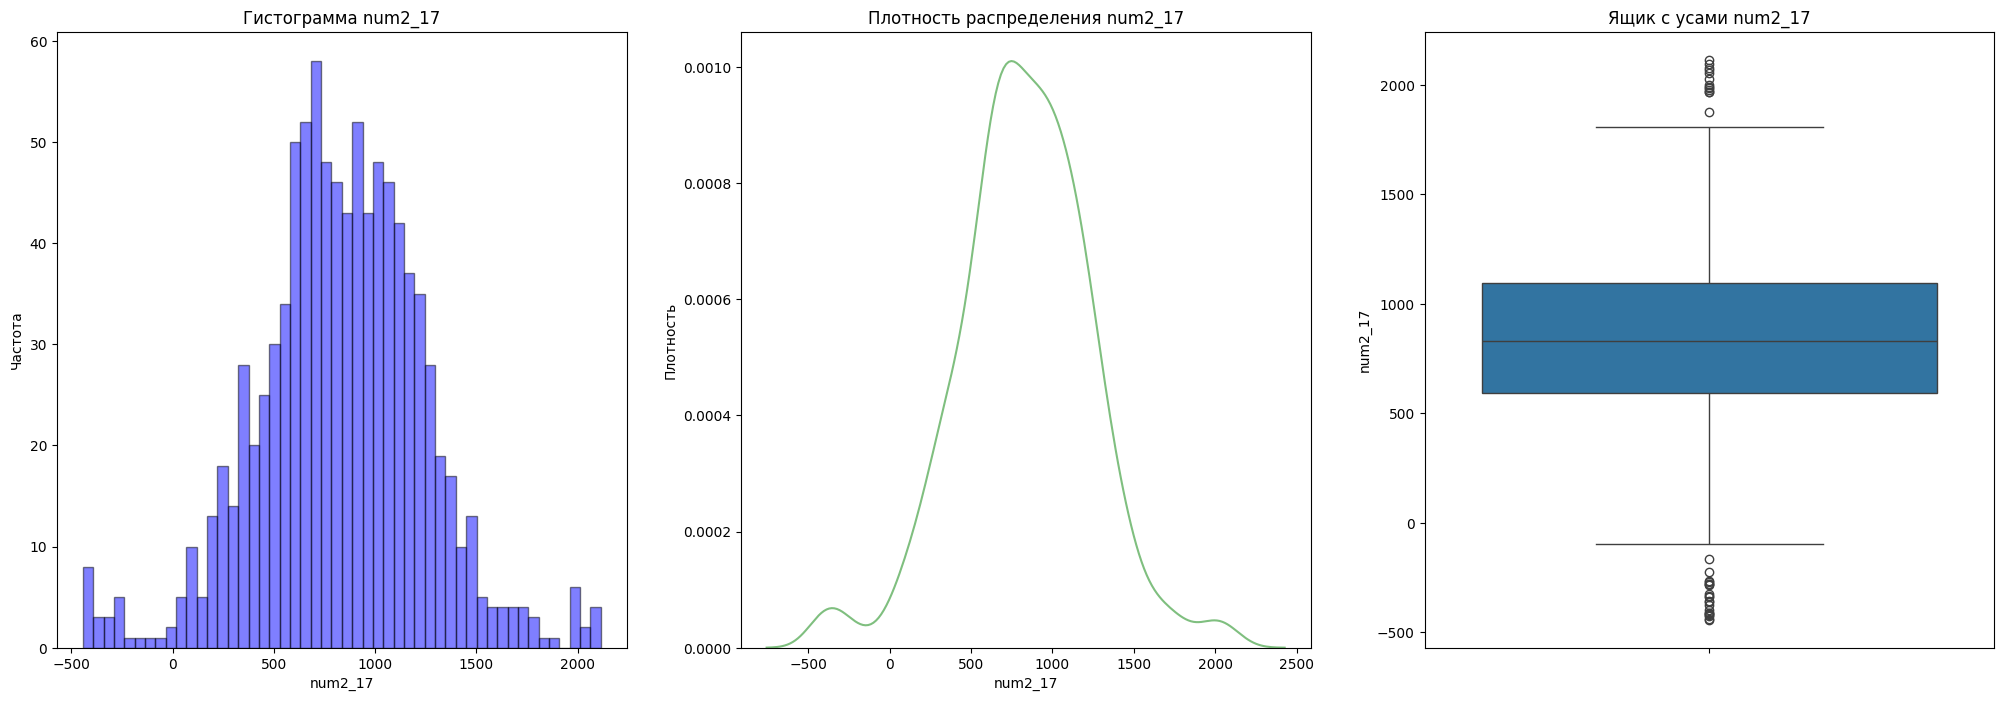

In [816]:
# Задаем столбик, по которому будем строить визуальное представление
col = "num2_17"

plt.figure(figsize=(25, 8))

# Гистограмма
plt.subplot(1, 3, 1)
plt.hist(dataframe[col], bins=50, color='blue', edgecolor='black', alpha=0.5)
plt.title(f'Гистограмма {col}')
plt.xlabel(col)
plt.ylabel('Частота')

# Оценка плотности распределения (график)
plt.subplot(1, 3, 2)
sns.kdeplot(dataframe[col], color='green', alpha=0.5)
plt.title(f'Плотность распределения {col}')
plt.xlabel(col)
plt.ylabel('Плотность')

# Ящик с усами
plt.subplot(1, 3, 3)
sns.boxplot(dataframe[col])
plt.title(f'Ящик с усами {col}')
plt.ylabel(col)

plt.show()

Здесь с данными получше, они нормально распределены с мат ожиданием в +-800, однако очень много значений за межквартильным размахом.

### Анализ num3_17

К сожалению, кто-то додумался в количественной переменной хранить объекты, а не float числа.

In [817]:
dataframe['num3_17'].dtypes

dtype('O')

In [818]:
# Удаляем строки с пустым значением в поле num3_17
num3_17_df = dataframe['num3_17']
num3_17_df = num3_17_df.replace(" ", np.nan)
num3_17_df = num3_17_df.replace("-", np.nan)
num3_17_df.astype('float64')

C:\Users\maksi\AppData\Local\Temp\ipykernel_15628\1971224234.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  num3_17_df = num3_17_df.replace("-", np.nan)


0      234.452862
1      193.074047
2      271.721837
3             NaN
4      259.617643
          ...    
995    131.946806
996           NaN
997    346.595296
998    320.187178
999           NaN
Name: num3_17, Length: 1000, dtype: float64

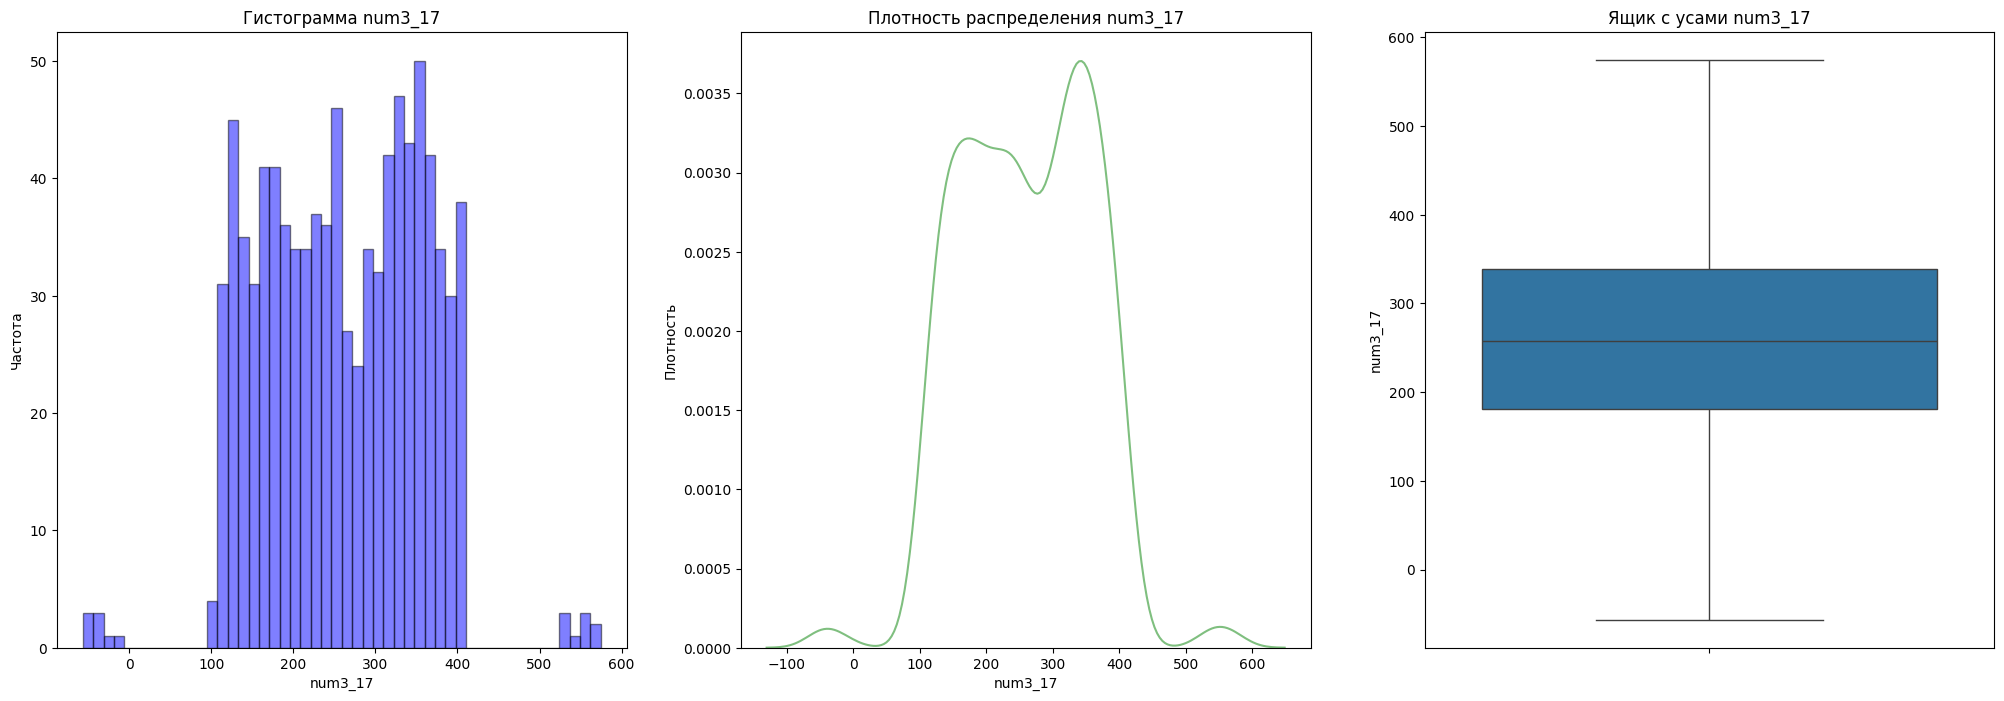

In [819]:
# Задаем столбик, по которому будем строить визуальное представление
col = "num3_17"

plt.figure(figsize=(25, 8))

# Гистограмма
plt.subplot(1, 3, 1)
plt.hist(num3_17_df, bins=50, color='blue', edgecolor='black', alpha=0.5)
plt.title(f'Гистограмма {col}')
plt.xlabel(col)
plt.ylabel('Частота')

# Оценка плотности распределения (график)
plt.subplot(1, 3, 2)
sns.kdeplot(num3_17_df, color='green', alpha=0.5)
plt.title(f'Плотность распределения {col}')
plt.xlabel(col)
plt.ylabel('Плотность')

# Ящик с усами
plt.subplot(1, 3, 3)
sns.boxplot(num3_17_df)
plt.title(f'Ящик с усами {col}')
plt.ylabel(col)

plt.show()

Как можно заметить, распределение похоже на распределение num2_17, только нормальность гораздо меньше выражена. По сути это равномерное распределение с отклоненными значениями (выбросами) по краям (в менше 0 и больше 500).

## Задание 2. Провести проверку правдоподобности исходных данных.

Проверка  правдоподобности  исходных  данных  должна  включать проверку типов исходных данных, лишних пропусков, невозможных значений и т.п. Привести найденные значения к нужному формату.

In [820]:
dataframe.dtypes

cat7_motivesForEmployeesToWorkBetter     object
cat11_nationality                        object
num1_17                                 float64
num2_17                                 float64
num3_17                                  object
dtype: object

Как мы уже заметили из прошлого задания, в колонке num3_17 хранится неправильный тип данных - object, вместо float64. Это будет первое, что мы исправим.

In [821]:
# Преобразуем пустые строчки и символш минуса в NaN
dataframe["num3_17"] = dataframe["num3_17"].replace(['','-', ' '], np.nan)
dataframe["num3_17"].astype("float64")

C:\Users\maksi\AppData\Local\Temp\ipykernel_15628\1440521134.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe["num3_17"] = dataframe["num3_17"].replace(['','-', ' '], np.nan)


0      234.452862
1      193.074047
2      271.721837
3             NaN
4      259.617643
          ...    
995    131.946806
996           NaN
997    346.595296
998    320.187178
999           NaN
Name: num3_17, Length: 1000, dtype: float64

In [822]:
# Теперь в num3_17 хранится правильный тип данных
dataframe.dtypes

cat7_motivesForEmployeesToWorkBetter     object
cat11_nationality                        object
num1_17                                 float64
num2_17                                 float64
num3_17                                 float64
dtype: object

Дальше исправим проблемы в качественных переменных. Здесь есть проблема с заглавной буквой, поэтому применим ко всем значениям столбца метод lower(), а также тут часто в качестве пропусков используются строки (пустая строка или знак минус), а не NaN объект. Такое надо исправлять!

In [823]:
dataframe['cat7_motivesForEmployeesToWorkBetter'] = dataframe['cat7_motivesForEmployeesToWorkBetter'].str.lower().replace(['','-', ' '], np.nan)
dataframe['cat11_nationality'] = dataframe['cat11_nationality'].str.lower().replace(['','-', ' '], np.nan)

In [824]:
dataframe['cat7_motivesForEmployeesToWorkBetter'].value_counts()

cat7_motivesForEmployeesToWorkBetter
peer motivation                      335
recognition                          316
friendly work culture                210
professional growth opportunities     80
Name: count, dtype: int64

In [825]:
dataframe['cat11_nationality'].value_counts()

cat11_nationality
german     769
french     112
italian     60
Name: count, dtype: int64

Теперь с качественными перемнными всё хорошо.

Также исправим проблему, где в количественной переменной num1_17 вместо пропуска значения использовалось конкретное число -9999.0

In [826]:
# Заменяем значение переменной равное -9999 на NaN
dataframe['num1_17'] = dataframe['num1_17'].replace(-9999.0, np.nan)

In [827]:
# Теперь во всех перемнных есть пропуски
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   cat7_motivesForEmployeesToWorkBetter  941 non-null    object 
 1   cat11_nationality                     941 non-null    object 
 2   num1_17                               952 non-null    float64
 3   num2_17                               952 non-null    float64
 4   num3_17                               911 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


 Также, если судить по критерию "невозможные значения", то в качественных переменных всё хорошо, так как все возможные не NaN значения отображены на экране, и они все приемлемые. Что касается количественных переменных, то здесь мы не можем проверить по этому критерию, так как мы просто не знаем, что они значат (имеется в виду, что это за величина).

## Задание 3. Поиск аномальных значений.

Провести   поиск   значений   в   исходном   наборе   данных,   резко отличающихся    от   других    значений(выбросов). Строки    с найденными выбросами удалить из исходного набора данных.

Примечание:  для  поиска  выбросов  воспользоваться  методом  сигм (использовать  готовую  реализацию scipy.stats.sigmaclip)  и  метод квартилей (реализовать самостоятельно). Провести анализ полученных результатов. 
Использовать результаты очистки данных, полученных с помощью метода сигм.

In [828]:
# Для будущего анализа
old_dataframe = dataframe.copy()

### Метод сигм

Метод сигм будем применять для столбцов с приблизительно нормальным распределением (num1_17 и num2_17).

In [829]:
# low - нижняя граница значений
# upp - верхняя граница значений
# Все значения, что меньше low или больше upp стоит вырезать, так как они находятся за пределами участка, задаваемого сигма правилом.

# В качестве данного метода будем использовать правило трёх сигм (low и high зададим равными 3)

с_num1_17, low, upp = stats.sigmaclip(dataframe['num1_17'].dropna(), low=3.0, high=3.0)

In [830]:
# Удаляем из датафрейма все строки, значения num1_17 которых лежат за пределами полученного промежутка (от low до upp)
dataframe = dataframe[(dataframe['num1_17'].isna()) | ((dataframe['num1_17'] > low) & (dataframe['num1_17'] < upp))]

In [831]:
# Делаем всё то же самое для num2_17 (только для начала уберём NaN строки)
c_num2_17, low, upp = stats.sigmaclip(dataframe['num2_17'].dropna(), low=3.0, high=3.0)
dataframe = dataframe[(dataframe['num2_17'].isna()) | ((dataframe['num2_17'] > low) & (dataframe['num2_17'] < upp))]

Теперь сравним гистограммы данных значений до применения правила и после.

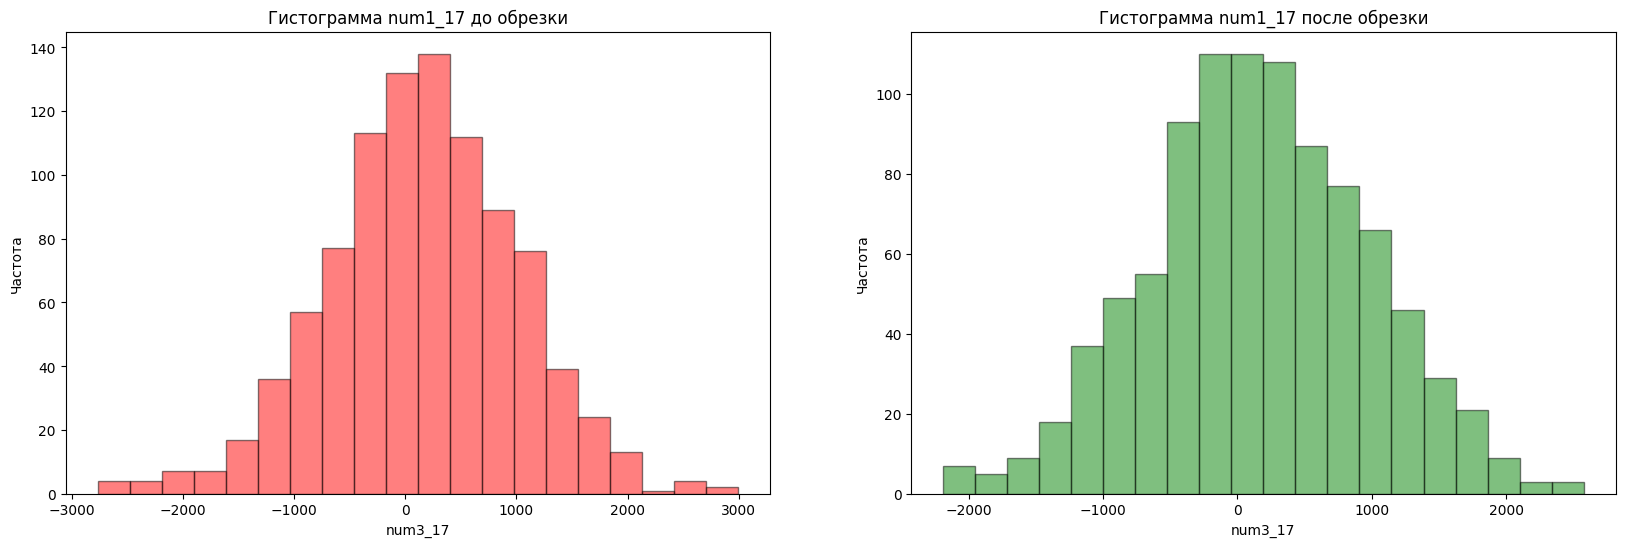

In [832]:
# Для num1_17
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.hist(old_dataframe['num1_17'], bins=20, color='red', edgecolor='black', alpha=0.5)
plt.title(f'Гистограмма num1_17 до обрезки')
plt.xlabel(col)
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
plt.hist(с_num1_17, bins=20, color='green', edgecolor='black', alpha=0.5)
plt.title(f'Гистограмма num1_17 после обрезки')
plt.xlabel(col)
plt.ylabel('Частота')

plt.show()

Как можно заметить, значения в крайних местах (ближе к +-3000) нормально-распределенного графика были удалены по правилу трёх сигм.

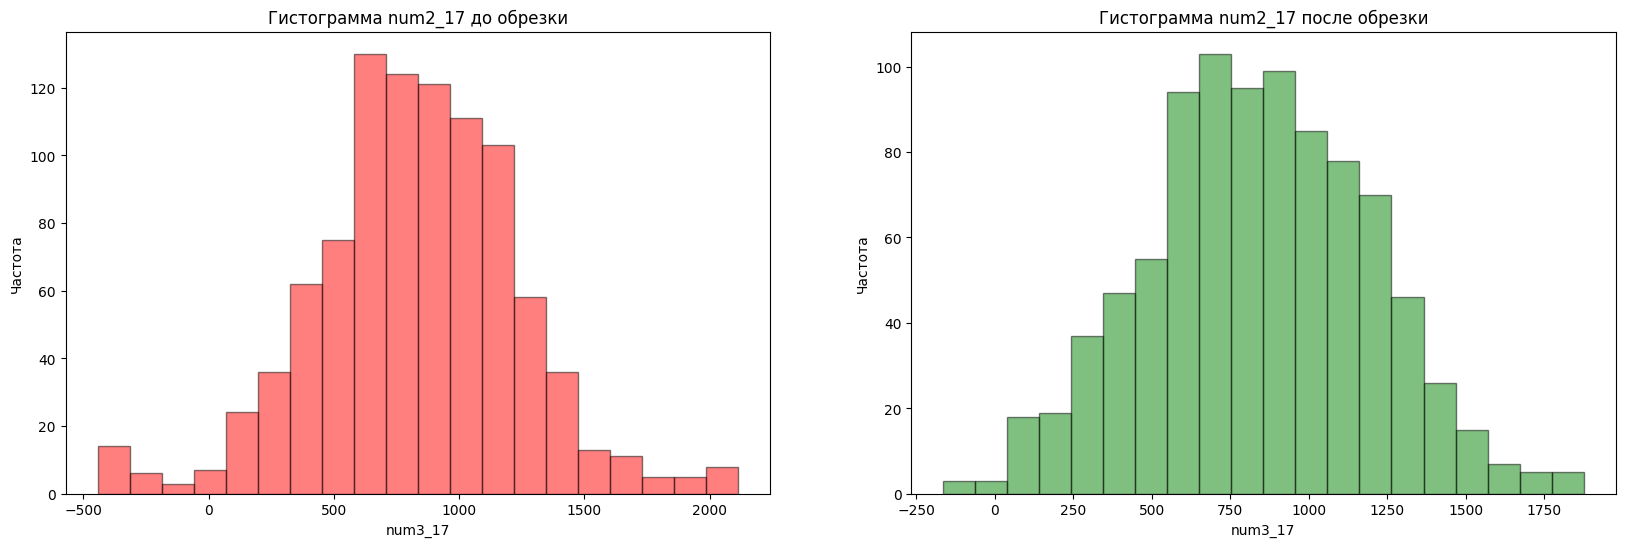

In [833]:
# Для num2_17
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.hist(old_dataframe['num2_17'], bins=20, color='red', edgecolor='black', alpha=0.5)
plt.title(f'Гистограмма num2_17 до обрезки')
plt.xlabel(col)
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
plt.hist(c_num2_17, bins=20, color='green', edgecolor='black', alpha=0.5)
plt.title(f'Гистограмма num2_17 после обрезки')
plt.xlabel(col)
plt.ylabel('Частота')

plt.show()

Результат такой же. Нормас

### Метод квантилей

Для наименее нормально-распределенного значения num3_17 будем использовать метод квартилей.

In [834]:
# Метод, который вычисляет верхнюю и нижнюю границу допустимых значений по методу квартилей
# Выбросы определяются как значения, находящиеся за пределами 1,5 * IQR от Q1 и Q3.
# rigidity - коэффициент "мягкости" отсечения (чем он меньше, тем больше выбросов будет отсечено)
def quantileclip(col, rigidity=1.5):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IRQ = Q3 - Q1
    return (Q1 - rigidity * IRQ), (Q3 + rigidity * IRQ)

In [835]:
# Находим границу и убираем выбросы
low, upp = quantileclip(dataframe['num3_17'].dropna())
dataframe = dataframe[(dataframe['num3_17'].isna()) | ((dataframe['num3_17'] > low) & (dataframe['num3_17'] < upp))]

Теперь сравним гистограммы данных значений до применения метода квартилей и после.

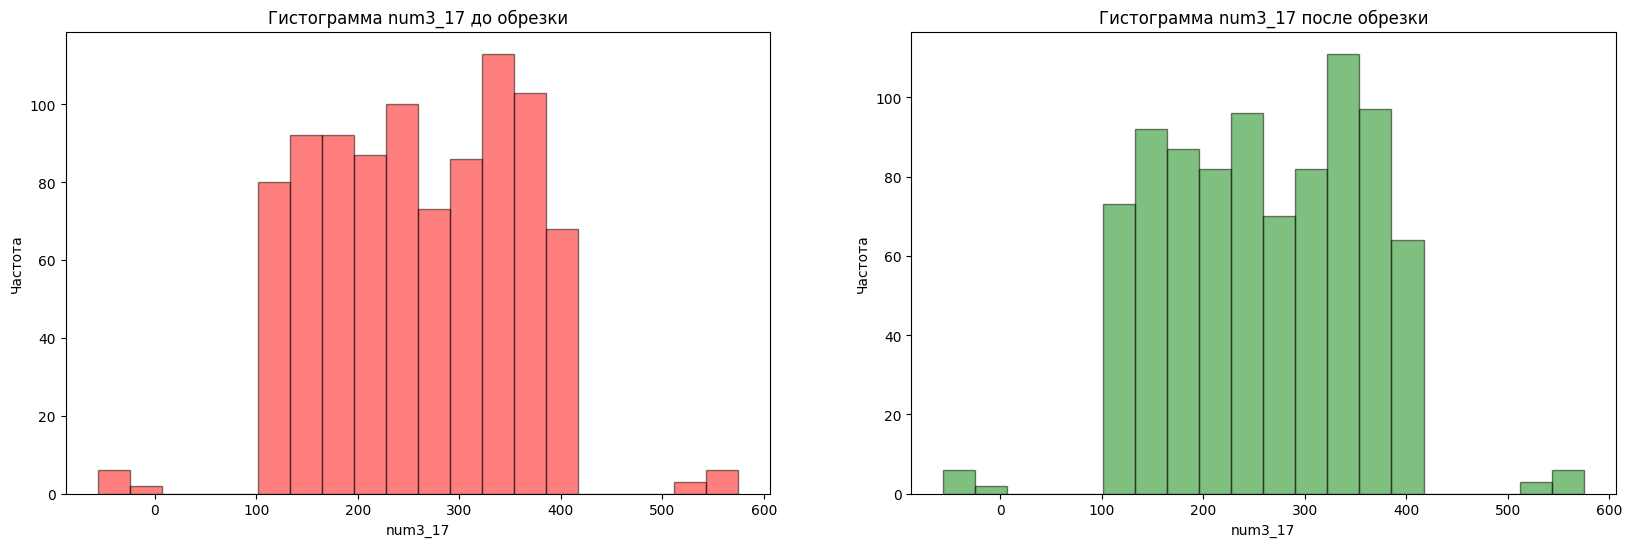

In [836]:
# Для num3_17
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.hist(old_dataframe['num3_17'], bins=20, color='red', edgecolor='black', alpha=0.5)
plt.title(f'Гистограмма num3_17 до обрезки')
plt.xlabel(col)
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
plt.hist(dataframe['num3_17'], bins=20, color='green', edgecolor='black', alpha=0.5)
plt.title(f'Гистограмма num3_17 после обрезки')
plt.xlabel(col)
plt.ylabel('Частота')

plt.show()

Как можно заметить, хвосты слева и справа остались, следовательно немалая часть наблюдений действительно лежит далеко от основной массы данных. Однако мы не промах поэтому увеличим жесткость метода квартилей (лично я считаю данные значения скорее выбросом).

In [837]:
# Находим границу и убираем выбросы
low, upp = quantileclip(dataframe['num3_17'].dropna(), rigidity=1)
dataframe = dataframe[(dataframe['num3_17'].isna()) | ((dataframe['num3_17'] > low) & (dataframe['num3_17'] < upp))]

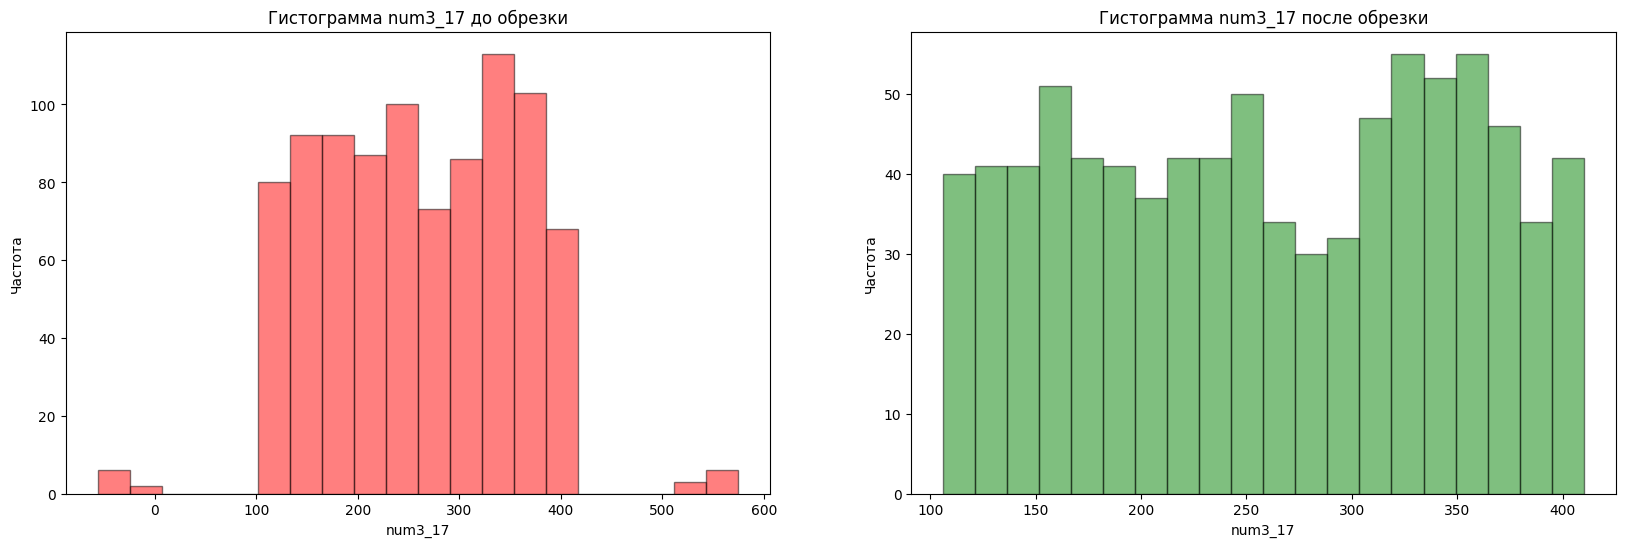

In [838]:
# Для num3_17
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.hist(old_dataframe['num3_17'], bins=20, color='red', edgecolor='black', alpha=0.5)
plt.title(f'Гистограмма num3_17 до обрезки')
plt.xlabel(col)
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
plt.hist(dataframe['num3_17'], bins=20, color='green', edgecolor='black', alpha=0.5)
plt.title(f'Гистограмма num3_17 после обрезки')
plt.xlabel(col)
plt.ylabel('Частота')

plt.show()

Теперь хвосты удалены, можем переходить к следующему заданию.

Небольшой вывод:

1) Метод сигм основывается на предположении, что данные распределены нормально, и использует среднее значение и стандартное отклонение. Он хорошо работает, если распределение симметричное и выбросы действительно редкие, так как позволяет удалять данные, лежащие за пределами заданного ко-ва сигм (обычно трёх - "правило трёх сигм").

2) Метод квартилей (межквартильный размах) менее чувствителен к экстремальным значениям, поскольку опирается на медиану и квартильные границы (Q1 и Q3). Он особенно полезен, когда распределение данных асимметрично или не подчиняется нормальному закону. Однако из-за его небольшой чувствительности иногда придется увеличивать жесткость метода.

## Задание 4. Поиск и восстановление пропущенных значений.

In [839]:
# Сохраняем, для проверки в самом конце
old_dataframe = dataframe.copy()

Провести   поиск   пропущенных   значений   в   исходных   данных. Вывести статистику   по   пропускам   для   каждого   признака. Восстановить  пропущенные  значения. 

Примечание:  для  первого признака для  восстановления пропусков  использовать  метод 𝑘-ближайших  соседей, для второго пропущенные  значения  заменить самым популярным значением, для третьего использовать среднее значение, для четвертого – медиану, для пятого – метод «𝑘-ближайших  соседей». Для  восстановления  пропусков  методом  «k-ближайших  соседей» использовать  одну  из  готовых  реализаций sklearn.impute.KNNImputer, impyute.imputation.cs.fast_knn.

In [840]:
# Смотрим кол-во пропусков в датафрейме до обработки
dataframe.isnull().sum()

cat7_motivesForEmployeesToWorkBetter    54
cat11_nationality                       54
num1_17                                 48
num2_17                                 48
num3_17                                 87
dtype: int64

### Восстановление пропущенных значений в cat11_nationality

In [841]:
# Получаем самое популярное значение (можно было сделать и с помощью SimpleImputer от sklearn)
mode = dataframe['cat11_nationality'].mode()[0]

In [842]:
# Заполняем пропуски самым популярным значением
dataframe['cat11_nationality'] = dataframe['cat11_nationality'].fillna(mode)

### Восстановление пропущенных значений в num1_17

In [843]:
# Получаем среднее значение
mean = dataframe['num1_17'].mean()

In [844]:
# Заполняем пропуски средним значением
dataframe['num1_17'] = dataframe['num1_17'].fillna(mean)

### Восстановление пропущенных значений в num2_17

In [845]:
# Получаем меидану значений
median = dataframe['num2_17'].median()

In [846]:
# Заполняем пропуски медианой
dataframe['num2_17'] = dataframe['num2_17'].fillna(median)

### Восстановление пропущенных значений в cat7_motivesForEmployeesToWorkBetter и в num3_17

In [847]:
from sklearn.impute import KNNImputer

Перед тем, как использовать метод к ближайших соседей для получения пропусков, нам необходимо произвести преобразование данных, поэтому сразу выполним 5 задание из практической.

## Задание 5. Преобразование данных.

In [848]:
# Перед тем, как делать преобразования
# Сбрасываем индексы, чтобы не были созданы пустые строки
dataframe = dataframe.reset_index(drop=True)

In [849]:
# Посмотрим на то, как выглядил датафрейм изначально
dataframe

,cat7_motivesForEmployeesToWorkBetter,cat11_nationality,num1_17,num2_17,num3_17
0,peer motivation,german,746.033603,575.685875,234.452862
1,professional growth opportunities,german,-1544.380353,1183.133379,193.074047
2,peer motivation,german,199.690743,694.251442,271.721837
3,recognition,german,70.527654,1114.841772,NaN
4,recognition,german,-40.749440,922.224064,259.617643
...,...,...,...,...,...
936,peer motivation,french,204.229855,829.959236,131.946806
937,peer motivation,german,461.172433,763.671026,NaN
938,friendly work culture,german,628.158238,612.552156,346.595296
939,recognition,german,-1142.011434,568.320956,320.187178


In [850]:
# Библиотеки для преобразования
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MinMaxScaler

### Преобразование OneHotEncoding для cat7_motivesForEmployeesToWorkBetter

In [851]:
# Для первого категориального признака применим OneHotEncoding
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(dataframe[['cat7_motivesForEmployeesToWorkBetter']])
encoded_columns = encoder.get_feature_names_out(['cat7_motivesForEmployeesToWorkBetter'])
encoded_df = pd.DataFrame(encoded, columns=encoded_columns)
# Посотрим, как будет выглядить таблица OneHotEncoding для данного признака
encoded_df.loc[10:15]

,cat7_motivesForEmployeesToWorkBetter_friendly work culture,cat7_motivesForEmployeesToWorkBetter_peer motivation,cat7_motivesForEmployeesToWorkBetter_professional growth opportunities,cat7_motivesForEmployeesToWorkBetter_recognition,cat7_motivesForEmployeesToWorkBetter_nan
10,1.0,0.0,0.0,0.0,0.0
11,1.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,1.0,0.0
13,0.0,0.0,0.0,0.0,1.0
14,0.0,0.0,0.0,1.0,0.0
15,0.0,1.0,0.0,0.0,0.0


In [852]:
# Теперь удалим колонку с NaN, а у тех строк, у которых эта колонка содержит 1, все остальные значения поменяем на NaN
encoded_df.loc[encoded_df['cat7_motivesForEmployeesToWorkBetter_nan'] == 1, ['cat7_motivesForEmployeesToWorkBetter_friendly work culture',	
                                                                             'cat7_motivesForEmployeesToWorkBetter_peer motivation',	
                                                                             'cat7_motivesForEmployeesToWorkBetter_professional growth opportunities', 
                                                                             'cat7_motivesForEmployeesToWorkBetter_recognition']] = np.nan
encoded_df.drop(columns=['cat7_motivesForEmployeesToWorkBetter_nan'], inplace=True)
encoded_df.loc[10:15]

,cat7_motivesForEmployeesToWorkBetter_friendly work culture,cat7_motivesForEmployeesToWorkBetter_peer motivation,cat7_motivesForEmployeesToWorkBetter_professional growth opportunities,cat7_motivesForEmployeesToWorkBetter_recognition
10,1.0,0.0,0.0,0.0
11,1.0,0.0,0.0,0.0
12,0.0,0.0,0.0,1.0
13,NaN,NaN,NaN,NaN
14,0.0,0.0,0.0,1.0
15,0.0,1.0,0.0,0.0


In [853]:
# Перенесем это на основной датафрейм
dataframe = pd.concat([dataframe.drop(columns=["cat7_motivesForEmployeesToWorkBetter"]), encoded_df], axis=1)

### Преобразование LabelEncoding для cat11_nationality

In [854]:
# Используем LabelEncoding для второго категориального признака 
le = LabelEncoder()
dataframe['cat11_nationality'] = le.fit_transform(dataframe['cat11_nationality'])

### Преобразование StandardScaler для num1_17 и	num2_17

In [855]:
# Используем StandardScaler (стандартизацию) для первого и второго числового признака, так как они распределены нормально
stsc = StandardScaler()
dataframe[['num1_17', 'num2_17']] = stsc.fit_transform(dataframe[['num1_17', 'num2_17']])

### Преобразование MinMaxScaler для num3_17

In [856]:
# Используем MinMaxScaler (нормализацию) для третьего числового признака, так как он распределен ненормально
mms = MinMaxScaler()
dataframe[['num3_17']] = mms.fit_transform(dataframe[['num3_17']])

In [857]:
# Теперь наш датафрейм выглядит следующим образом
dataframe[1:15]

,cat11_nationality,num1_17,num2_17,num3_17,cat7_motivesForEmployeesToWorkBetter_friendly work culture,cat7_motivesForEmployeesToWorkBetter_peer motivation,cat7_motivesForEmployeesToWorkBetter_professional growth opportunities,cat7_motivesForEmployeesToWorkBetter_recognition
1,1,-2.189503e+00,1.014716,0.286148,0.0,0.0,1.0,0.0
2,1,3.765077e-02,-0.415912,0.544983,0.0,1.0,0.0,0.0
3,1,-1.272886e-01,0.814872,NaN,0.0,0.0,0.0,1.0
4,1,-2.693879e-01,0.251210,0.505147,0.0,0.0,0.0,1.0
5,1,3.629411e-17,-1.472786,0.820966,1.0,0.0,0.0,0.0
6,0,1.001247e+00,-0.718683,0.138731,0.0,0.0,1.0,0.0
7,1,1.193146e+00,1.358794,0.712129,0.0,0.0,0.0,1.0
8,1,-8.446591e-01,-0.696117,0.539427,0.0,0.0,1.0,0.0
9,1,1.029418e+00,-1.541772,0.858511,0.0,1.0,0.0,0.0
10,1,1.167177e+00,0.552845,0.238154,1.0,0.0,0.0,0.0


## Возвращение к задаче 4. Метод k-ближайших соседей

После того, как мы выполнили преобразование параметров мы готовы перейти к нахождению пропусков с помощью метода k-ближайших соседей

In [858]:
# Применяем KNNImputer
imputer_knn = KNNImputer(n_neighbors=5, weights='distance', metric='nan_euclidean', add_indicator=False)
result = imputer_knn.fit_transform(dataframe)

In [859]:
# Пересоздаём датафрейм из заполненных параметров
imputer_knn_cols = ['cat11_nationality',
                    'num1_17',	
                    'num2_17',
                    'num3_17',	
                    'cat7_motivesForEmployeesToWorkBetter_friendly work culture',
                    'cat7_motivesForEmployeesToWorkBetter_peer motivation',
                    'cat7_motivesForEmployeesToWorkBetter_professional growth opportunities',	
                    'cat7_motivesForEmployeesToWorkBetter_recognition']
dataframe = pd.DataFrame(result, columns=imputer_knn_cols)

In [860]:
# Теперь наш датафрейм выглядит следующим образом
dataframe[1:15]

,cat11_nationality,num1_17,num2_17,num3_17,cat7_motivesForEmployeesToWorkBetter_friendly work culture,cat7_motivesForEmployeesToWorkBetter_peer motivation,cat7_motivesForEmployeesToWorkBetter_professional growth opportunities,cat7_motivesForEmployeesToWorkBetter_recognition
1,1.0,-2.189503e+00,1.014716,0.286148,0.000000,0.000000,1.000000,0.000000
2,1.0,3.765077e-02,-0.415912,0.544983,0.000000,1.000000,0.000000,0.000000
3,1.0,-1.272886e-01,0.814872,0.707273,0.000000,0.000000,0.000000,1.000000
4,1.0,-2.693879e-01,0.251210,0.505147,0.000000,0.000000,0.000000,1.000000
5,1.0,3.629411e-17,-1.472786,0.820966,1.000000,0.000000,0.000000,0.000000
6,0.0,1.001247e+00,-0.718683,0.138731,0.000000,0.000000,1.000000,0.000000
7,1.0,1.193146e+00,1.358794,0.712129,0.000000,0.000000,0.000000,1.000000
8,1.0,-8.446591e-01,-0.696117,0.539427,0.000000,0.000000,1.000000,0.000000
9,1.0,1.029418e+00,-1.541772,0.858511,0.000000,1.000000,0.000000,0.000000
10,1.0,1.167177e+00,0.552845,0.238154,1.000000,0.000000,0.000000,0.000000


Все пропуски заполнены!

Если в num3_17 все пустые значения заполнились нормально, то в cat7_motivesForEmployeesToWorkBetter произошла, так называемая, задача классификации. С помощью метода k-соседних деревьев мы получили вероятности принадлежности строки к тому или иному классу. В принципе, можно оставить и так, однако мы сделаем так, чтобы данные столбцы полностью соответствовали OneHotEncoding, для этого в подобных строках будем оставлять 1 там, где вероятност наибольшая, в остальных будут нули.

In [861]:
# Преобразуем dataframe (только со столбцами cat7_motivesForEmployeesToWorkBetter) в массив numpy
cat7_arr = dataframe[['cat7_motivesForEmployeesToWorkBetter_friendly work culture',
                    'cat7_motivesForEmployeesToWorkBetter_peer motivation',
                    'cat7_motivesForEmployeesToWorkBetter_professional growth opportunities',	
                    'cat7_motivesForEmployeesToWorkBetter_recognition']].to_numpy()

# Находим индекс максимального элемента в каждой строке
max_indices = np.argmax(cat7_arr, axis=1)

In [862]:
# Создаем нулевую матрицу той же формы
binary_matrix = np.zeros_like(cat7_arr)

In [863]:
# Устанавливаем 1 в колонке с максимальным значением
binary_matrix[np.arange(cat7_arr.shape[0]), max_indices] = 1

In [864]:
# Преобразуем обратно в dataFrame с исходными колонками
cat7_df = pd.DataFrame(binary_matrix, columns=['cat7_motivesForEmployeesToWorkBetter_friendly work culture',
                    'cat7_motivesForEmployeesToWorkBetter_peer motivation',
                    'cat7_motivesForEmployeesToWorkBetter_professional growth opportunities',	
                    'cat7_motivesForEmployeesToWorkBetter_recognition'])

In [865]:
# Перенесем это на основной датафрейм
dataframe[['cat7_motivesForEmployeesToWorkBetter_friendly work culture',
            'cat7_motivesForEmployeesToWorkBetter_peer motivation',
            'cat7_motivesForEmployeesToWorkBetter_professional growth opportunities',	
            'cat7_motivesForEmployeesToWorkBetter_recognition']] = cat7_df

In [866]:
# Смотрим на готовый датафрейм
dataframe[1:15]

,cat11_nationality,num1_17,num2_17,num3_17,cat7_motivesForEmployeesToWorkBetter_friendly work culture,cat7_motivesForEmployeesToWorkBetter_peer motivation,cat7_motivesForEmployeesToWorkBetter_professional growth opportunities,cat7_motivesForEmployeesToWorkBetter_recognition
1,1.0,-2.189503e+00,1.014716,0.286148,0.0,0.0,1.0,0.0
2,1.0,3.765077e-02,-0.415912,0.544983,0.0,1.0,0.0,0.0
3,1.0,-1.272886e-01,0.814872,0.707273,0.0,0.0,0.0,1.0
4,1.0,-2.693879e-01,0.251210,0.505147,0.0,0.0,0.0,1.0
5,1.0,3.629411e-17,-1.472786,0.820966,1.0,0.0,0.0,0.0
6,0.0,1.001247e+00,-0.718683,0.138731,0.0,0.0,1.0,0.0
7,1.0,1.193146e+00,1.358794,0.712129,0.0,0.0,0.0,1.0
8,1.0,-8.446591e-01,-0.696117,0.539427,0.0,0.0,1.0,0.0
9,1.0,1.029418e+00,-1.541772,0.858511,0.0,1.0,0.0,0.0
10,1.0,1.167177e+00,0.552845,0.238154,1.0,0.0,0.0,0.0


## Прочие проверки

In [867]:
# Смотрим кол-во пропусков в датафрейме после обработки
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 8 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   cat11_nationality                                                       941 non-null    float64
 1   num1_17                                                                 941 non-null    float64
 2   num2_17                                                                 941 non-null    float64
 3   num3_17                                                                 941 non-null    float64
 4   cat7_motivesForEmployeesToWorkBetter_friendly work culture              941 non-null    float64
 5   cat7_motivesForEmployeesToWorkBetter_peer motivation                    941 non-null    float64
 6   cat7_motivesForEmployeesToWorkBetter_professional growth opportunities  941 non-nul

Теперь пропусков в датафрейме нет!

In [868]:
# Посмотрим все возможные значения для столбца cat11
dataframe['cat11_nationality'].value_counts()

cat11_nationality
1.0    782
0.0    103
2.0     56
Name: count, dtype: int64

Три национальности так и остались, с cat11 всё хорошо.

Для дополнительной проверки cat7, сосчитаем кол-во единиц в каждом столбце cat7, если их сумма будет равна кол-ву строк в таблице (941), то всё у нас хорошо.

In [869]:
cat7_sum = 0
for i in ['cat7_motivesForEmployeesToWorkBetter_friendly work culture',
                    'cat7_motivesForEmployeesToWorkBetter_peer motivation',
                    'cat7_motivesForEmployeesToWorkBetter_professional growth opportunities',	
                    'cat7_motivesForEmployeesToWorkBetter_recognition']:
    cat7_sum += dataframe[i].sum()
print(cat7_sum)

941.0


C cat7 тоже всё хорошо.

Теперь посмотрим, как изменились графики плотности числовых признаков, после того, как мы добавили пропуски.

In [870]:
# Применяем стандартизацию и масштабирование к данным старого датафрейма (до заполнения пропусков)
old_dataframe[['num1_17', 'num2_17']] = stsc.fit_transform(old_dataframe[['num1_17', 'num2_17']])
old_dataframe[['num3_17']] = mms.fit_transform(old_dataframe[['num3_17']])

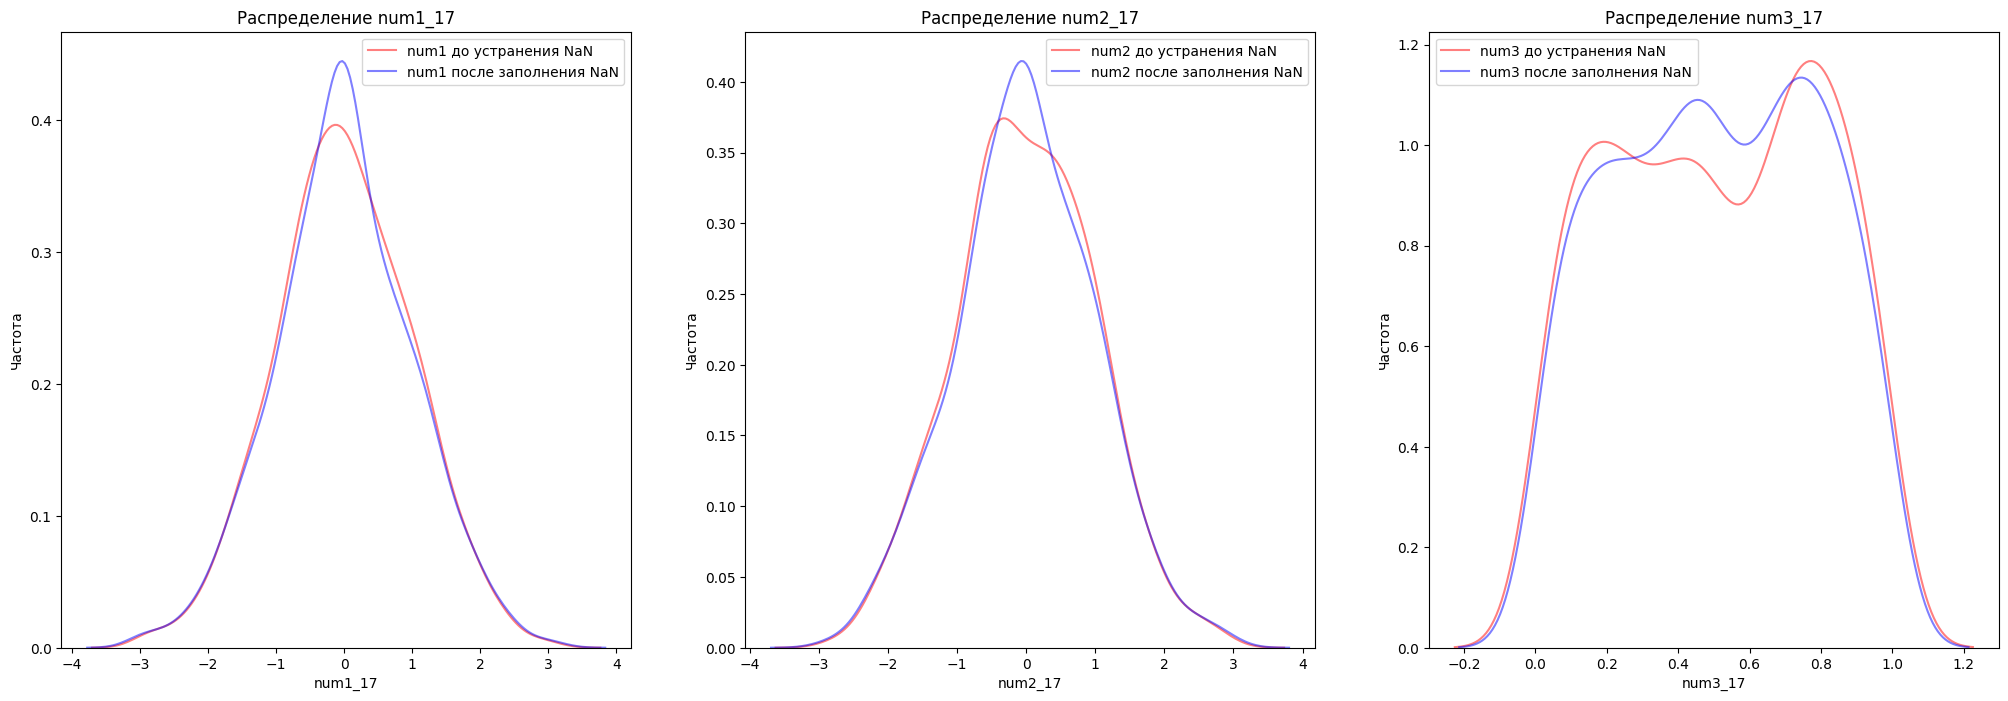

In [882]:
plt.figure(figsize=(25, 8))

for idx, col in enumerate(['num1_17','num2_17', 'num3_17']):

    # Гистограмма
    plt.subplot(1, 3, idx+1)
    sns.kdeplot(old_dataframe[col], color='red', alpha=0.5)
    sns.kdeplot(dataframe[col], color='blue', alpha=0.5)
    plt.legend([f'{col[:-3]} до устранения NaN', f'{col[:-3]} после заполнения NaN'])
    plt.title(f'Распределение {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')

plt.show()

Как и следовало ожидать, у num1 и num2 изменилась высота в середине, поскольку было добавлено больше "средних значений". А вот у распределения num3 немного изменилась форма графика, также появилось больше средних значений.

# Выводы

Мы познакомились с основными  задачами  предварительной обработки    исходных    данных,    изучили    основные    методы предварительной   обработки   данных,   сформировали   навыки выполнения   предварительной   обработки   исходных   данных   с помощью языка программирования Python.